# **Autor**: Állef Robson C. Barbosa

<center><h1><b>SUS: Predição de Pacientes com Alto Custo Hospitalar</b></h1></center>





### Dicionário da base de dados **sus_500k_linhas.**

<div style="font-size: 18px;">
<table>
<thead>
<tr>
<th>Nome da Coluna</th>
<th>Descrição</th>
</tr>
</thead>
<tbody>
<tr><td><code>UF</code></td><td>Unidade Federativa (Estado)</td></tr>
<tr><td><code>SEXO</code></td><td>Gênero do paciente: 1 - Masculino, 3 - Feminino.</td></tr>
<tr><td><code>QT_DIARIAS</code></td><td>Quantidade de dias de internação do paciente (2016 e 2017).</td></tr>
<tr><td><code>VAL_UTI</code></td><td>Valor referente aos gastos em UTI.</td></tr>
<tr><td><code>IDADE</code></td><td>Idade do paciente.</td></tr>
<tr><td><code>INSTRU</code></td><td>Grau de instrução.</td></tr>
<tr><td><code>RACA_COR</code></td><td>Raça/Cor do paciente.</td></tr>
<tr><td><code>BODY_SYSTEM</code></td><td>Agrupamento de doenças.</td></tr>
<tr><td><code>H_COST</code></td><td>Variável alvo: 1 se custo > percentil 95%, 0 caso contrário.</td></tr>
</tbody>
</table>
</div>


## Entendimento da base de dados:

### Visualização da base de dados

In [ ]:
import pandas as pd

data = pd.read_csv('pacientes_de_alto_custo_no_sus_v2.csv', nrows=1000)
data.to_csv('sus_1k_linhas.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv('sus_1k_linhas.csv')
df

,UF,SEXO,QT_DIARIAS,VAL_UTI,IDADE,INSTRU,RACA_COR,BODY_SYSTEM,H_COST
0,35,3,21,0.00,36,0,1,3,0
1,25,1,10,0.00,23,0,4,3,0
2,31,1,2,0.00,17,0,3,3,0
3,31,1,26,0.00,60,0,99,3,0
4,29,1,2,0.00,18,0,99,3,0
...,...,...,...,...,...,...,...,...,...
995,42,3,2,0.00,23,0,1,2,0
996,35,3,2,0.00,51,0,3,2,0
997,41,3,2,478.72,47,0,1,2,0
998,21,3,3,0.00,66,0,3,2,0


### Tipos de dados

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   UF           1000 non-null   int64  
 1   SEXO         1000 non-null   int64  
 2   QT_DIARIAS   1000 non-null   int64  
 3   VAL_UTI      1000 non-null   float64
 4   IDADE        1000 non-null   int64  
 5   INSTRU       1000 non-null   int64  
 6   RACA_COR     1000 non-null   int64  
 7   BODY_SYSTEM  1000 non-null   int64  
 8   H_COST       1000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 70.4 KB


### Estatísticas descritivas

In [ ]:
df[['VAL_UTI', 'IDADE']].describe()

,VAL_UTI,IDADE
count,1000.00000,1000.000000
mean,63.49014,48.832000
std,950.38263,14.698633
min,0.00000,7.000000
25%,0.00000,38.000000
50%,0.00000,50.000000
75%,0.00000,60.000000
max,27765.76000,76.000000


### Valores nulos

In [ ]:
df.isna().sum()

,0
UF,0
SEXO,0
QT_DIARIAS,0
VAL_UTI,0
IDADE,0
INSTRU,0
RACA_COR,0
BODY_SYSTEM,0
H_COST,0


## Análise Exploratória de Dados (EDA):

## Matriz de correlação

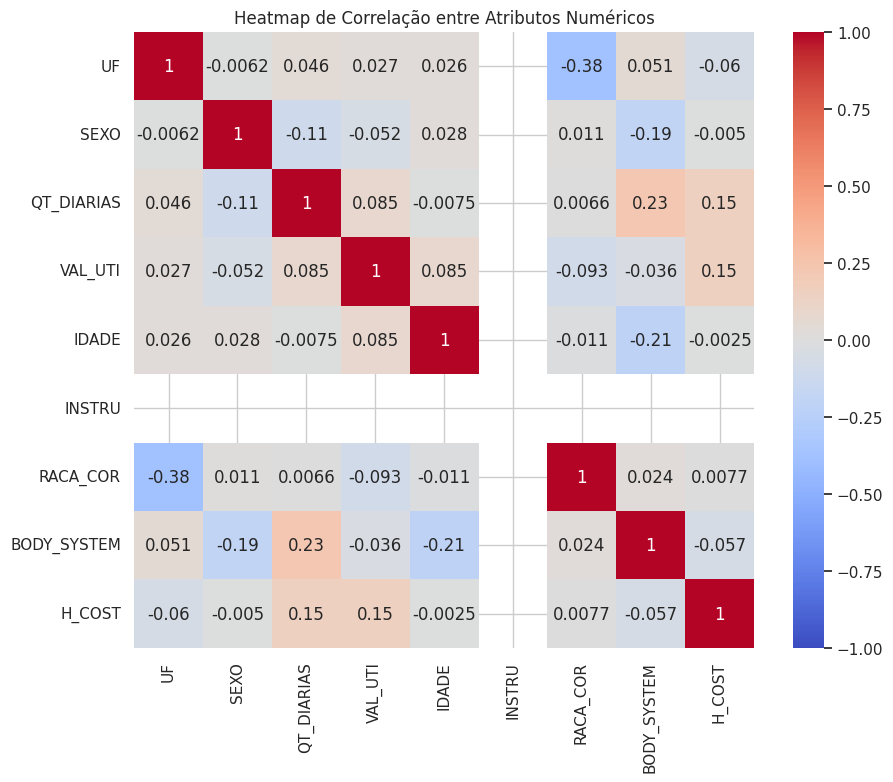

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr(method='spearman') #pode alterar para pearson(padrão), spearman ou kendall
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap de Correlação entre Atributos Numéricos')
plt.show()

### Histogramas

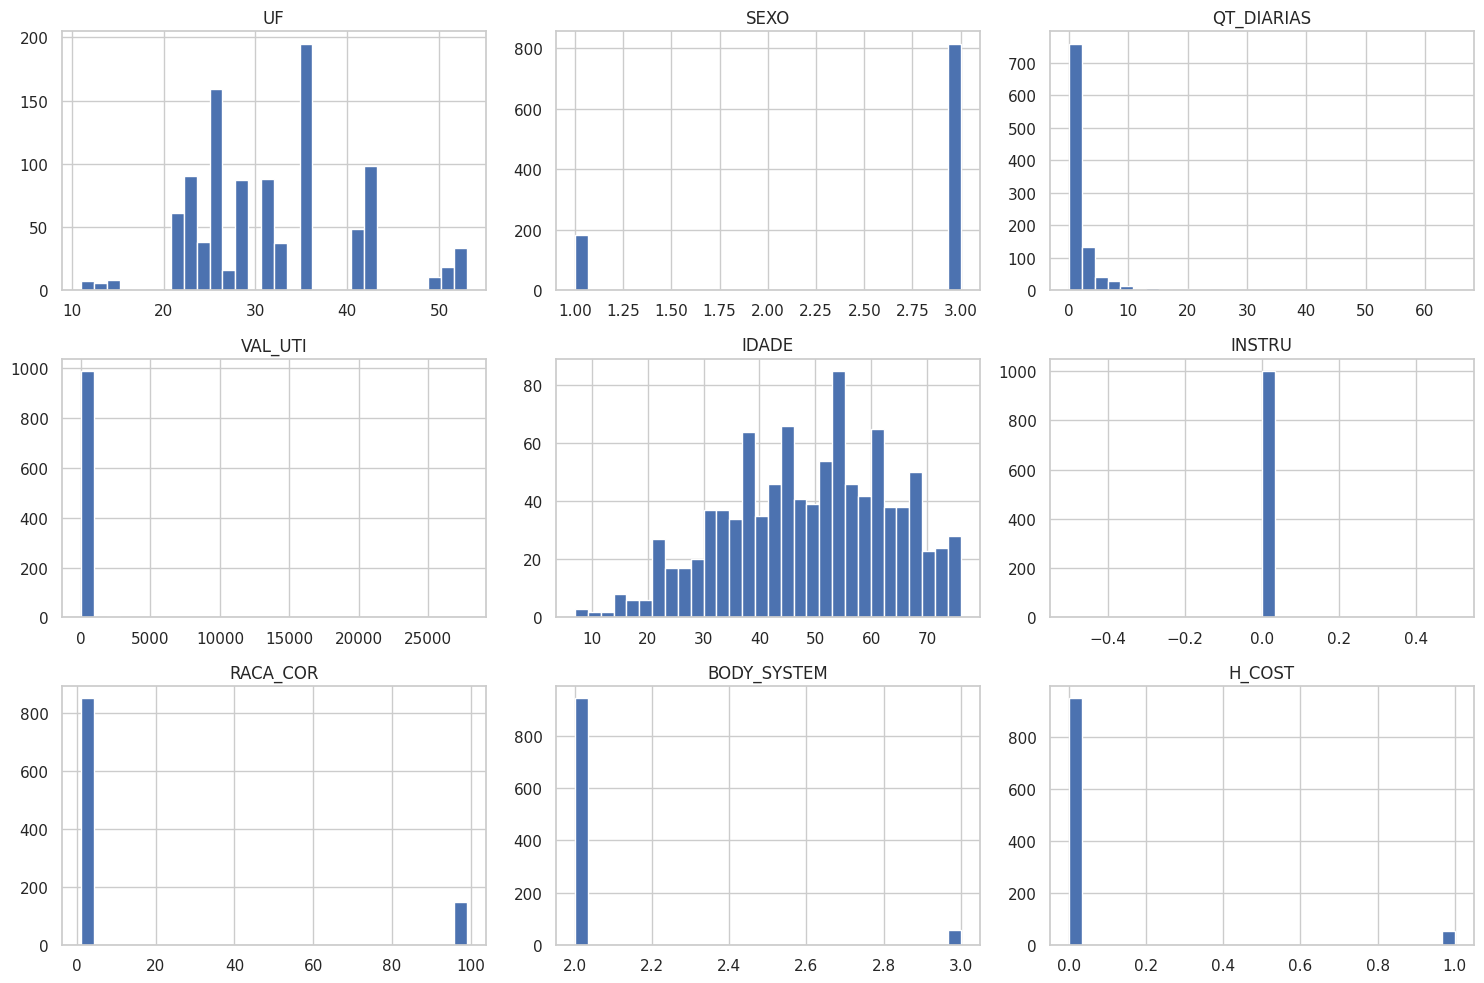

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


### Boxplots

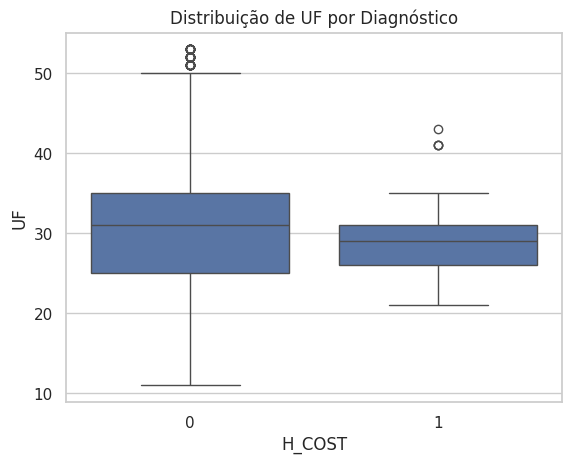

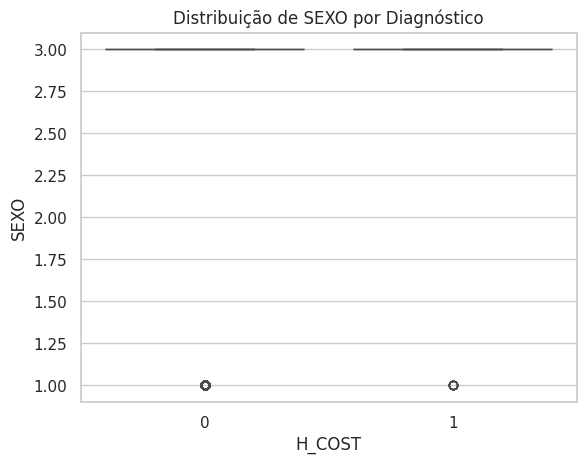

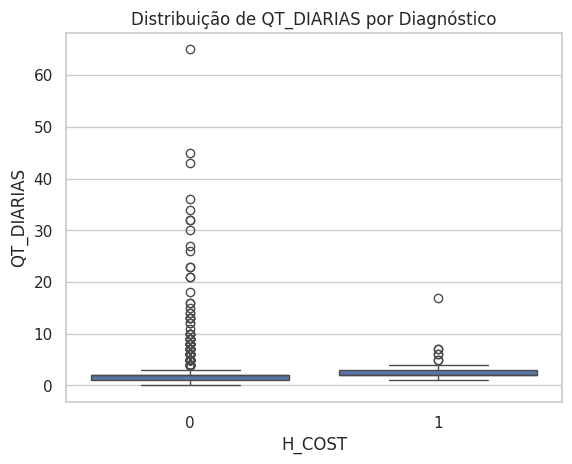

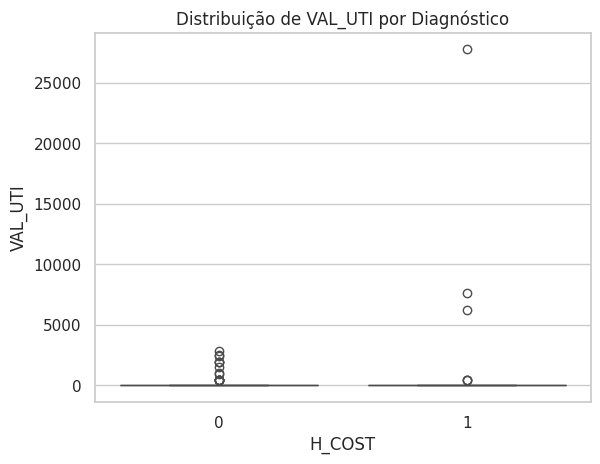

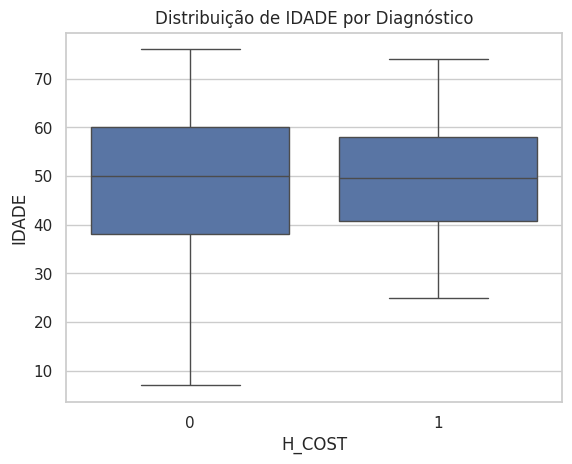

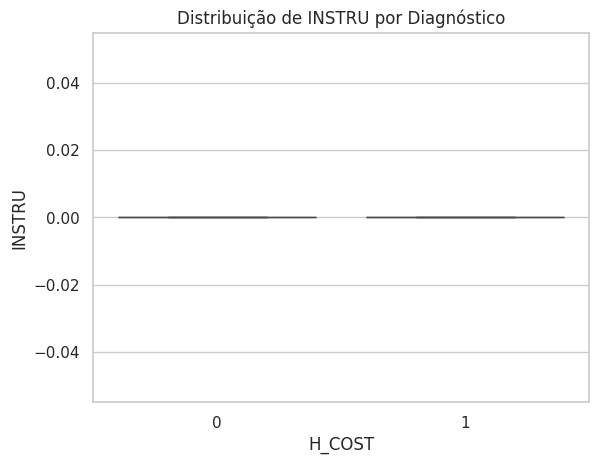

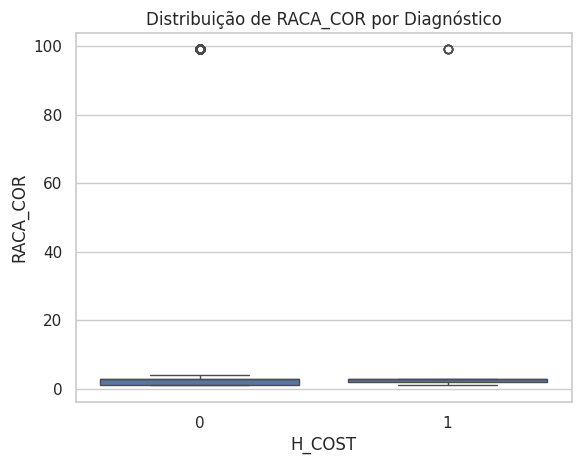

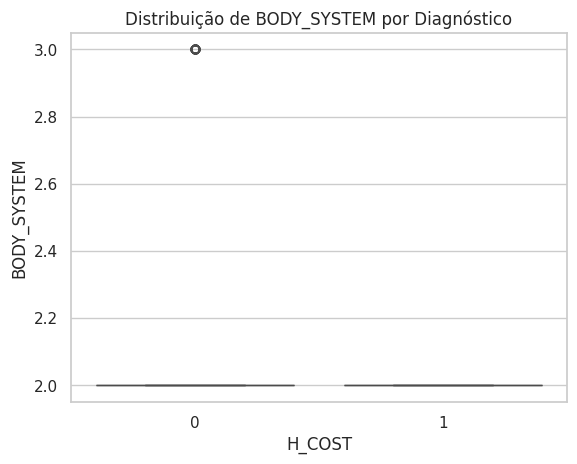

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df.columns:
    if column != 'H_COST':
        sns.boxplot(x='H_COST', y=column, data=df)
        plt.title(f'Distribuição de {column} por Diagnóstico')
        plt.show()


### Redução de dimensionalidade com PCA para visualização

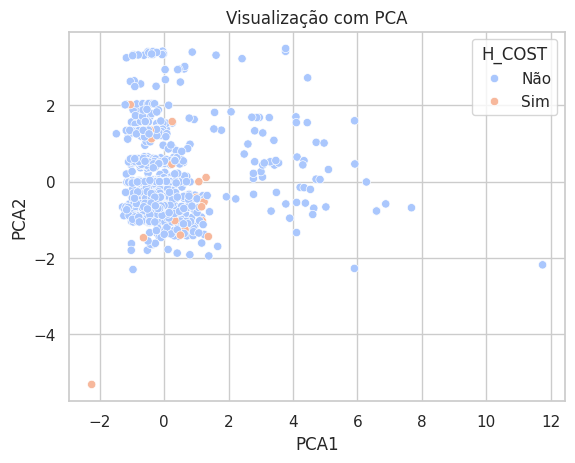

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

features = df.drop(columns=['H_COST'])
features_scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['H_COST'] = df['H_COST'].map({0: 'Não', 1: 'Sim'})


sns.scatterplot(x='PCA1', y='PCA2', hue='H_COST', data=pca_df, palette='coolwarm')
plt.title('Visualização com PCA')
plt.show()


### Proporção de H_COST em relação aos outros atributos

<Figure size 1200x600 with 0 Axes>

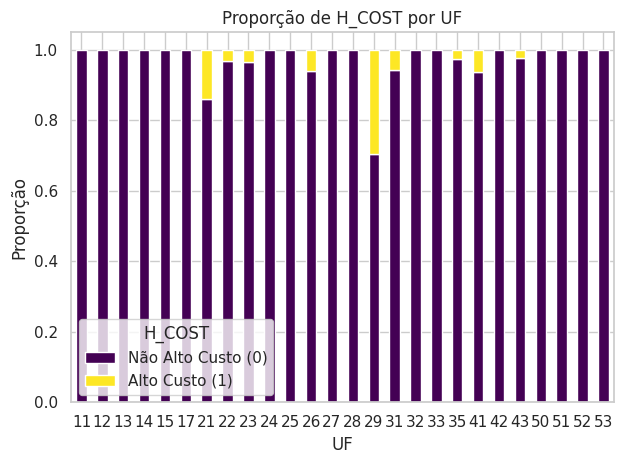

<Figure size 1200x600 with 0 Axes>

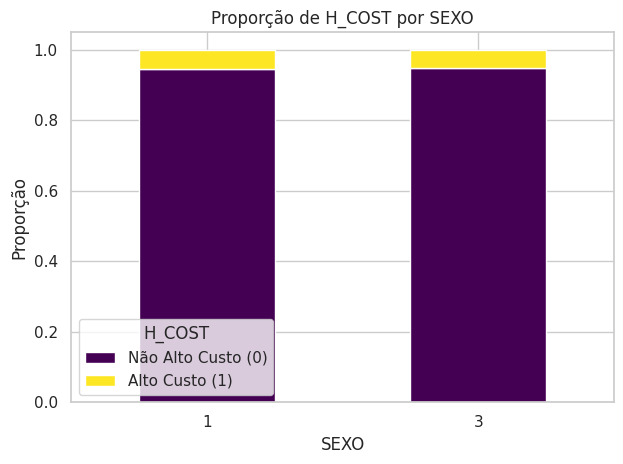

<Figure size 1200x600 with 0 Axes>

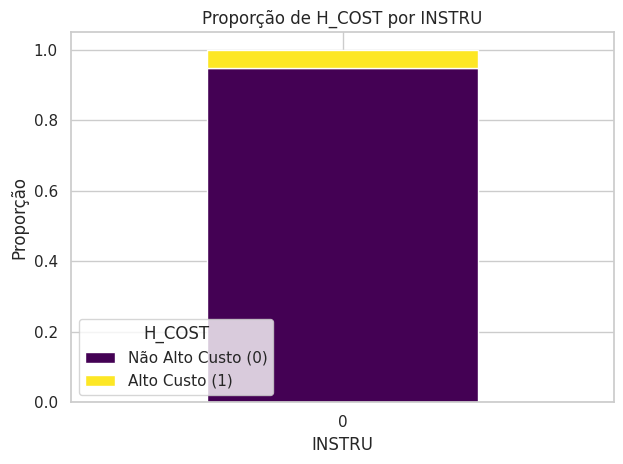

<Figure size 1200x600 with 0 Axes>

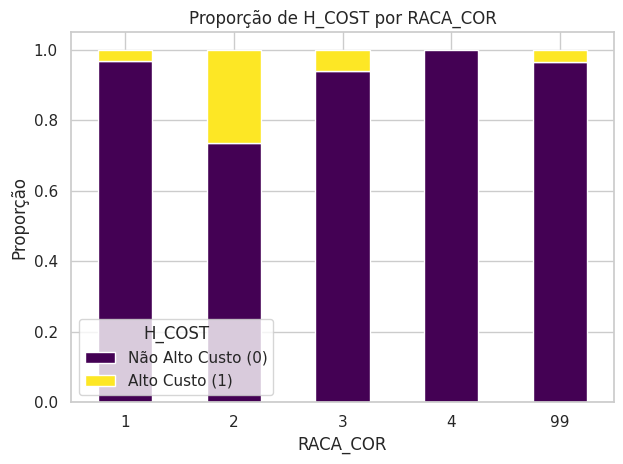

<Figure size 1200x600 with 0 Axes>

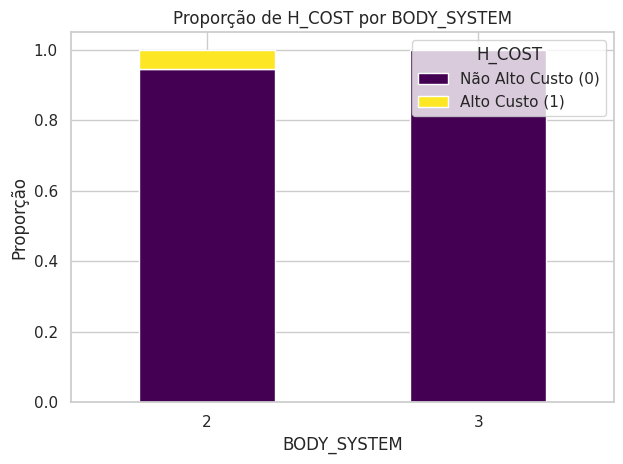

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

variables = ['UF', 'SEXO', 'INSTRU', 'RACA_COR', 'BODY_SYSTEM']

def plot_bar_charts(df, variable, target='H_COST'):
    plt.figure(figsize=(12, 6))
    crosstab = pd.crosstab(df[variable], df[target], normalize='index')
    ax = crosstab.plot(kind='bar', stacked=True, colormap='viridis')
    ax.set_title(f'Proporção de {target} por {variable}')
    ax.set_xlabel(variable)
    ax.set_ylabel('Proporção')
    ax.legend(title=target, labels=['Não Alto Custo (0)', 'Alto Custo (1)'])
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    plt.tight_layout()
    plt.show()


for var in variables:
    plot_bar_charts(df, var)

### Ver a quantidade de cada classe presente em target

In [ ]:
df['H_COST'].value_counts()

,count
H_COST,
0,948
1,52


## Pré-Processamento

### Contagem de outliers

In [ ]:
import pandas as pd


outliers_por_coluna = {}


for coluna in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    outliers_por_coluna[coluna] = outliers.shape[0]

outliers_df = pd.DataFrame(list(outliers_por_coluna.items()), columns=['Coluna', 'Número de Outliers'])

print(outliers_df)


        Coluna  Número de Outliers
0           UF                  51
1         SEXO                 184
2   QT_DIARIAS                 143
3      VAL_UTI                  22
4        IDADE                   0
5       INSTRU                   0
6     RACA_COR                 148
7  BODY_SYSTEM                  55
8       H_COST                  52


## Divisão , normalização ou padronização e baseline:

### Separar features (X) e alvo (y)

In [ ]:
X = df.drop(columns=['H_COST'])
y = df['H_COST']

In [ ]:
print(f"Shape do DataFrame de features: {X.shape}")
display(X)

Shape do DataFrame de features: (1000, 8)


,UF,SEXO,QT_DIARIAS,VAL_UTI,IDADE,INSTRU,RACA_COR,BODY_SYSTEM
0,35,3,21,0.00,36,0,1,3
1,25,1,10,0.00,23,0,4,3
2,31,1,2,0.00,17,0,3,3
3,31,1,26,0.00,60,0,99,3
4,29,1,2,0.00,18,0,99,3
...,...,...,...,...,...,...,...,...
995,42,3,2,0.00,23,0,1,2
996,35,3,2,0.00,51,0,3,2
997,41,3,2,478.72,47,0,1,2
998,21,3,3,0.00,66,0,3,2


### Divisão treino e teste com estratificação

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

### Normalização com MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

### Recriar DataFrames e salvar como CSV

In [ ]:
train_df = pd.DataFrame(X_train_minmax, columns=X.columns)
train_df['H_COST'] = y_train.values

test_df = pd.DataFrame(X_test_minmax, columns=X.columns)
test_df['H_COST'] = y_test.values

train_df.to_csv('sus_train.csv', index=False)
test_df.to_csv('sus_test.csv', index=False)

In [ ]:
train_df

,UF,SEXO,QT_DIARIAS,VAL_UTI,IDADE,INSTRU,RACA_COR,BODY_SYSTEM,H_COST
0,0.333333,1.0,0.023256,0.0,0.347826,0.0,0.020408,0.0,0
1,0.357143,1.0,0.023256,0.0,0.376812,0.0,1.000000,0.0,0
2,0.714286,1.0,0.023256,0.0,0.521739,0.0,0.000000,0.0,0
3,0.571429,1.0,0.023256,0.0,0.681159,0.0,0.000000,0.0,0
4,0.738095,0.0,0.046512,0.0,0.681159,0.0,0.000000,0.0,0
...,...,...,...,...,...,...,...,...,...
695,0.357143,1.0,0.023256,0.0,0.333333,0.0,0.000000,0.0,0
696,0.571429,1.0,0.069767,0.0,0.391304,0.0,0.020408,0.0,0
697,0.238095,1.0,0.046512,0.0,0.434783,0.0,0.020408,0.0,0
698,0.952381,1.0,0.023256,0.0,0.942029,0.0,1.000000,0.0,0


### Balanceamento de vlasses com SMOTE (Undersampling (comentado))

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


X_train = pd.read_csv('sus_train.csv').drop(columns='H_COST')
y_train = pd.read_csv('sus_train.csv')['H_COST']

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

df_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
df_train_smote['H_COST'] = y_train_smote
df_train_smote.to_csv('sus_train_smote.csv', index=False)

# --- Alternativa: Undersampling (comentado) ---
# undersampler = RandomUnderSampler(random_state=42)
# X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# df_train_under = pd.DataFrame(X_train_under, columns=X_train.columns)
# df_train_under['is_legendary'] = y_train_under
# df_train_under.to_csv('poke_train_minmax_undersampling.csv', index=False)


In [ ]:
df = pd.read_csv('sus_train_smote.csv')
count = df['H_COST'].value_counts()
count

,count
H_COST,
0,664
1,664


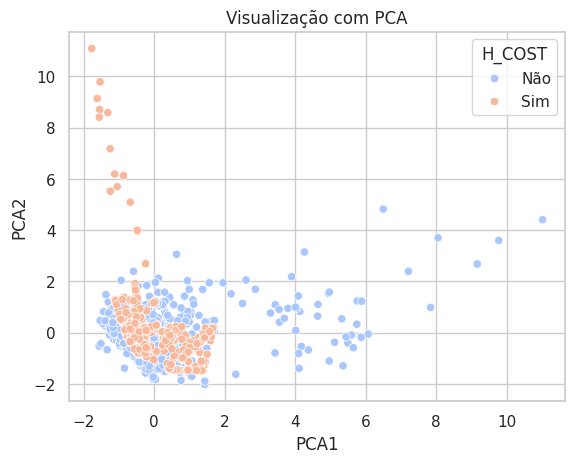

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

features = df.drop(columns=['H_COST'])
features_scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['H_COST'] = df['H_COST'].map({0: 'Não', 1: 'Sim'})


sns.scatterplot(x='PCA1', y='PCA2', hue='H_COST', data=pca_df, palette='coolwarm')
plt.title('Visualização com PCA')
plt.show()


## Baseline de Classificação:

Acurácia do baseline: 0.9466666666666667

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       284
           1       0.00      0.00      0.00        16

    accuracy                           0.95       300
   macro avg       0.47      0.50      0.49       300
weighted avg       0.90      0.95      0.92       300



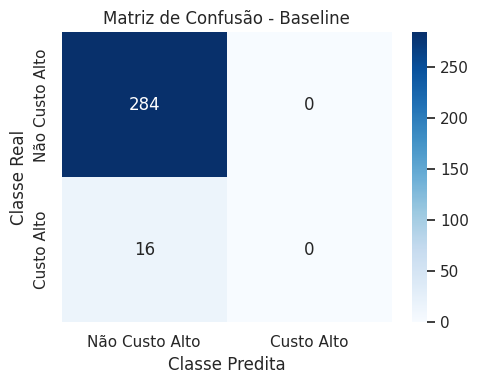

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

train_df = pd.read_csv('sus_train_smote.csv')
test_df = pd.read_csv('sus_test.csv')

X_train = train_df.drop(columns='H_COST')
y_train = train_df['H_COST']

X_test = test_df.drop(columns='H_COST')
y_test = test_df['H_COST']

baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train, y_train)

y_pred = baseline.predict(X_test)

print("Acurácia do baseline:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, zero_division=0))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Custo Alto', 'Custo Alto'], yticklabels=['Não Custo Alto', 'Custo Alto'])
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão - Baseline')
plt.tight_layout()
plt.show()